# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(691)

#### Setup

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.title_fontsize'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Global Matplotlib settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.title_fontsize'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Global Seaborn style
sns.set_style("white")

# Define palettes
_tab_10 = sns.color_palette("tab10")
_RdYlGn = sns.color_palette("RdYlGn", n_colors=6)


### Loading Dataset

In [4]:
train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.head()

,statement,subject,speaker,party_affiliation,context,subject_count,readability_score,num_named_entities,entity_types_present,has_citation_words,polarity_shift_words_count,uncertainty_words_count,negation_words_count,tfidf_score_sum,sentiment_score,label,label_id
0,says annies list political group supports thir...,abortion,dwayne-bohac,republican,a mailer,1,9.081818,1,1,0,0,0,0,2.886169,0.2500,false,1
1,decline coal start started natural gas took st...,"energy,history,job-accomplishments",scott-surovell,democrat,a floor speech.,3,7.773333,1,1,0,0,0,0,3.305099,0.3612,half-true,3
2,hillary clinton agrees john mccain voting give...,foreign-policy,barack-obama,democrat,denver,1,9.209474,4,2,0,0,0,0,3.394159,0.3182,mostly-true,4
3,health care reform legislation likely mandate ...,health-care,blog-posting,none,a news release,1,8.756667,0,0,0,0,0,0,3.089276,0.7579,false,1
4,economic turnaround started end term,"economy,jobs",charlie-crist,democrat,an interview on cnn,2,7.190000,0,0,0,0,0,0,2.207947,0.0000,half-true,3


In [6]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   statement                   10240 non-null  object 
 1   subject                     10240 non-null  object 
 2   speaker                     10240 non-null  object 
 3   party_affiliation           10240 non-null  object 
 4   context                     10240 non-null  object 
 5   subject_count               10240 non-null  int64  
 6   readability_score           10240 non-null  float64
 7   num_named_entities          10240 non-null  int64  
 8   entity_types_present        10240 non-null  int64  
 9   has_citation_words          10240 non-null  int64  
 10  polarity_shift_words_count  10240 non-null  int64  
 11  uncertainty_words_count     10240 non-null  int64  
 12  negation_words_count        10240 non-null  int64  
 13  tfidf_score_sum             102

## Data Visualization

In [7]:
labels_order = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']

In [8]:
numeric_features = [
    'subject_count',
    'readability_score',
    'num_named_entities',
    'entity_types_present',
    'has_citation_words',
    'polarity_shift_words_count',
    'uncertainty_words_count',
    'negation_words_count',
    'tfidf_score_sum',
    'sentiment_score'
]

In [9]:
categorical_features = ['subject', 'speaker', 'party_affiliation', 'context']

### Label Distribution

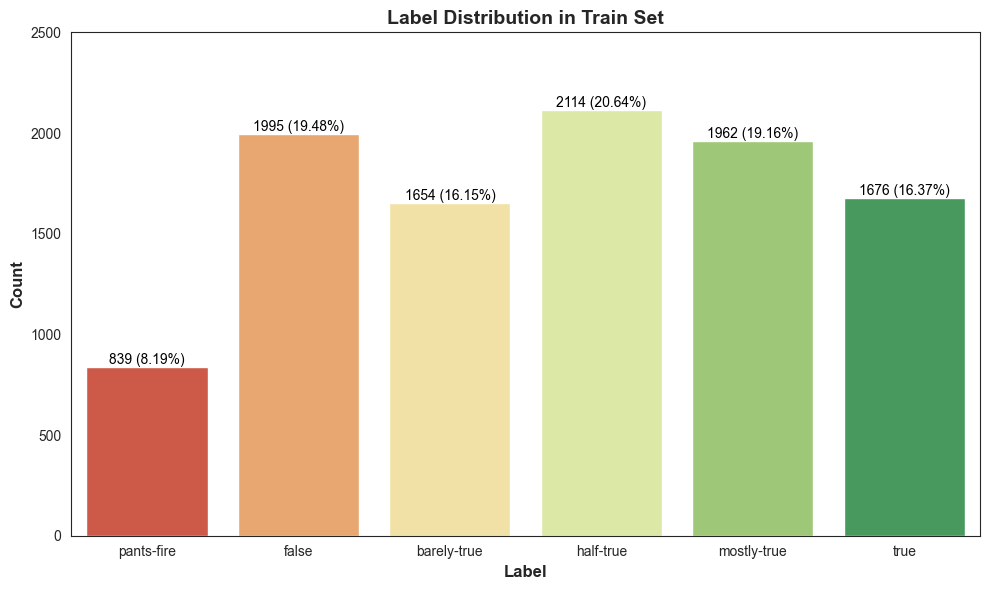

In [10]:
ax = sns.countplot(
    x='label',
    data=train,
    palette=_RdYlGn,
    order=labels_order,
    hue='label',
    hue_order=labels_order,
    legend=False
)

plt.title('Label Distribution in Train Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.ylim(0, 2500)

total_count = len(train['label'])
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        f'{count} ({(count/total_count)*100:.2f}%)',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

### Correlation Heatmap (Numerical Features)

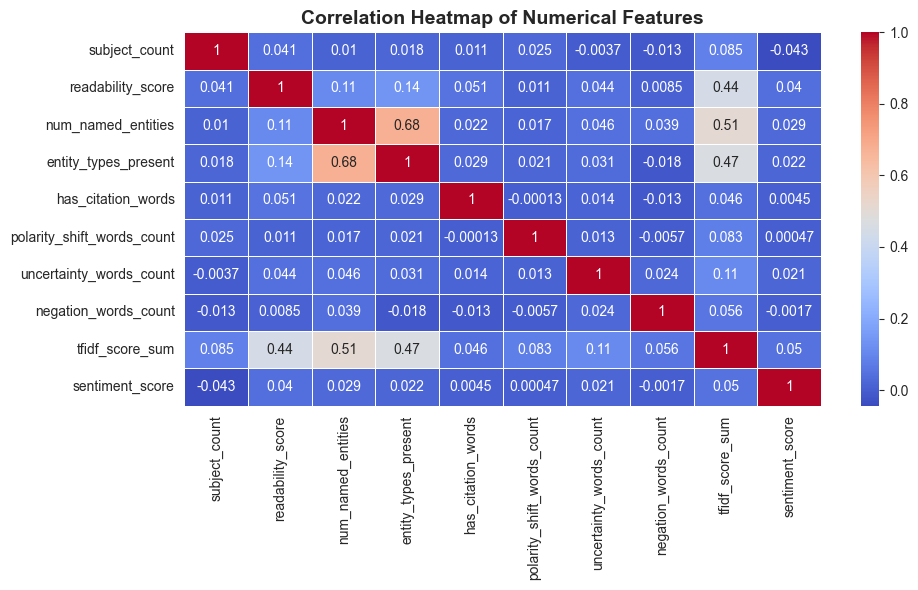

In [11]:
numeric_features = [
    'subject_count',
    'readability_score',
    'num_named_entities',
    'entity_types_present',
    'has_citation_words',
    'polarity_shift_words_count',
    'uncertainty_words_count',
    'negation_words_count',
    'tfidf_score_sum',
    'sentiment_score'
]

corr_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### Distribution Plots of Numerical Features

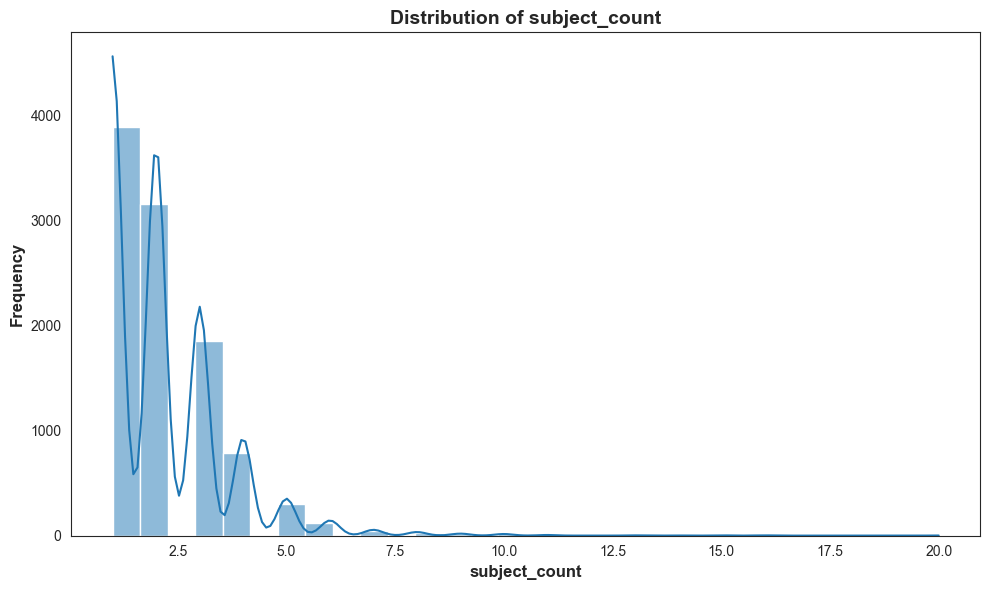

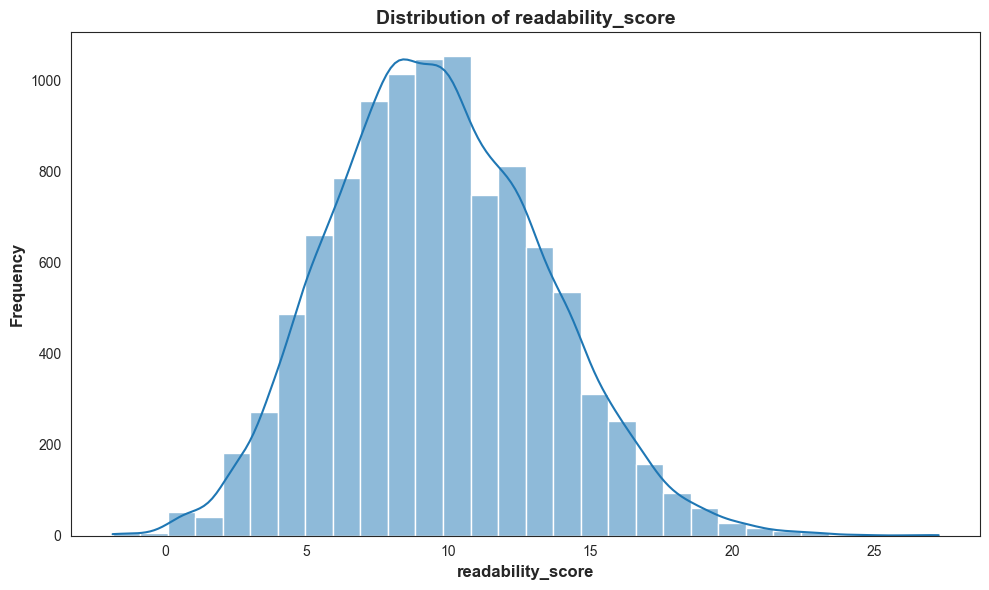

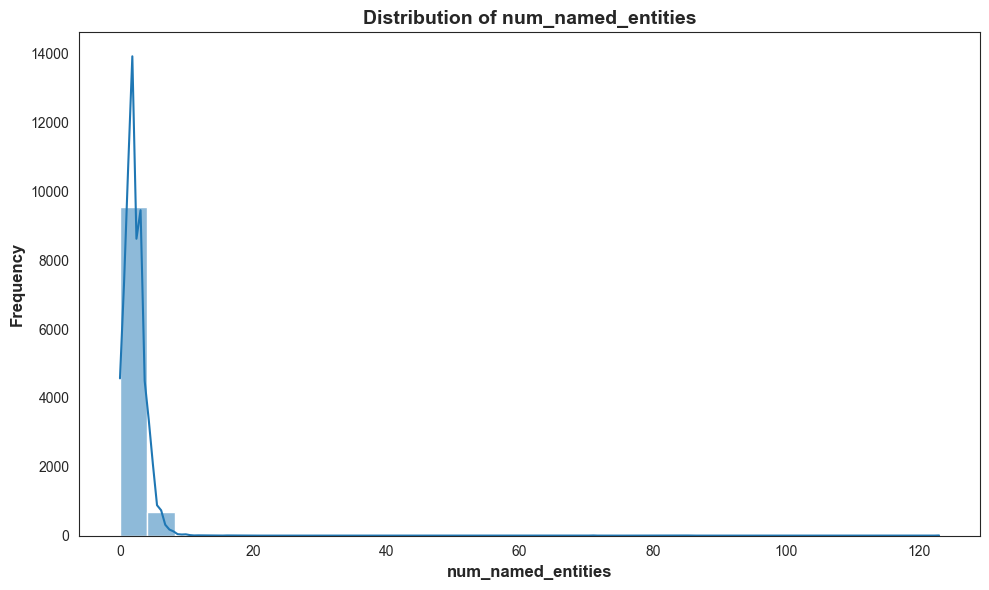

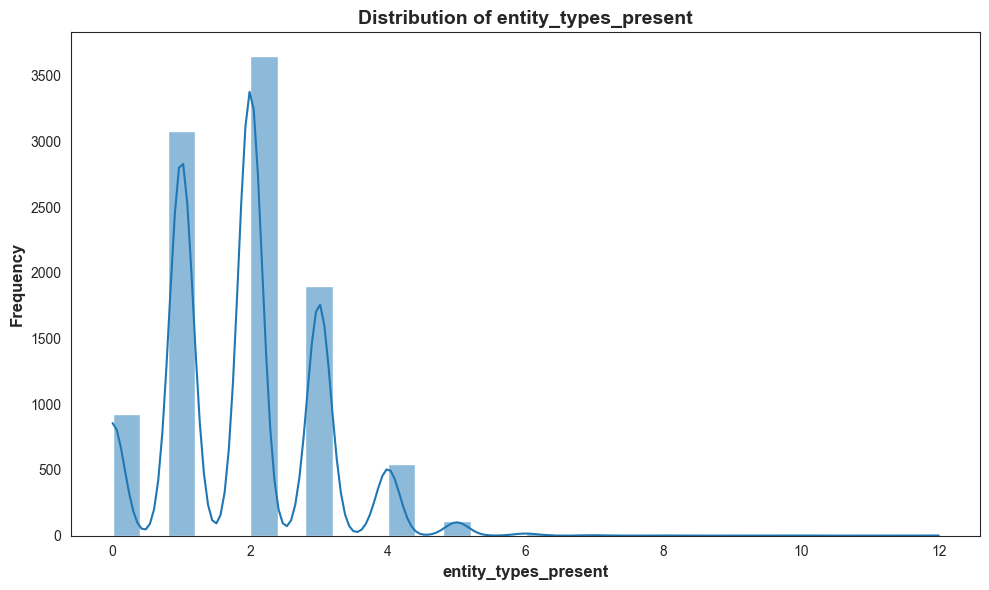

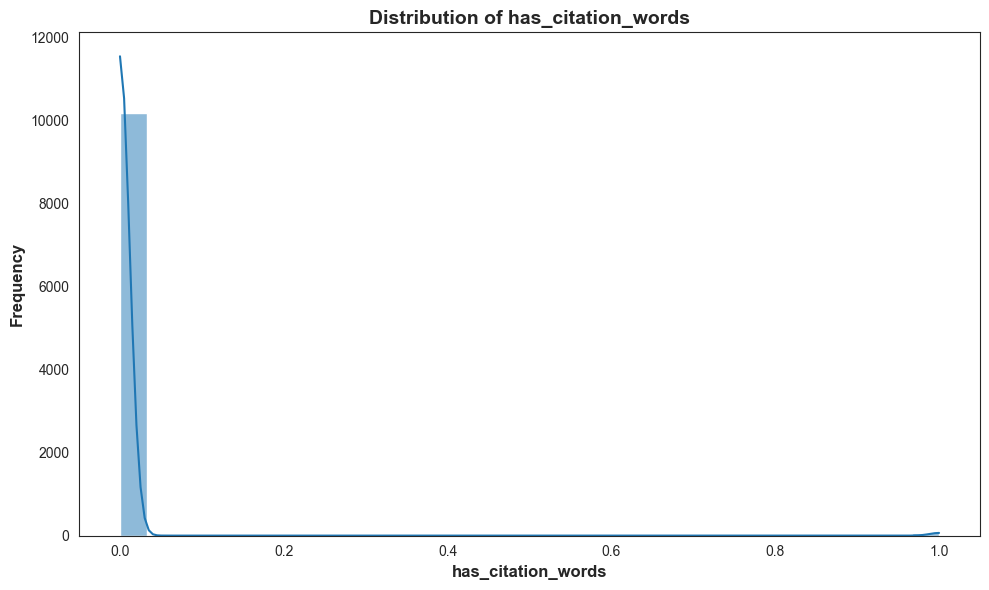

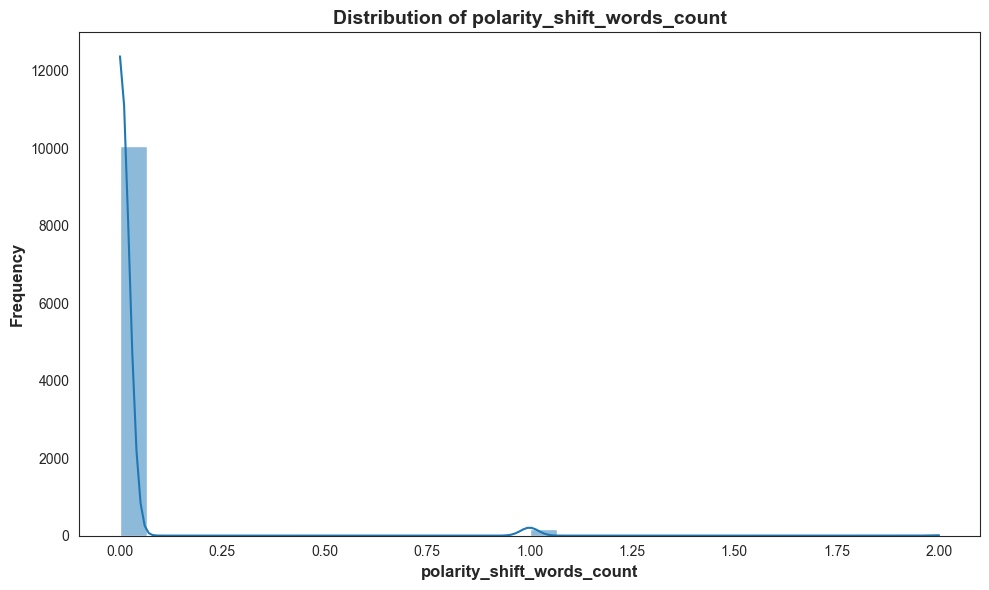

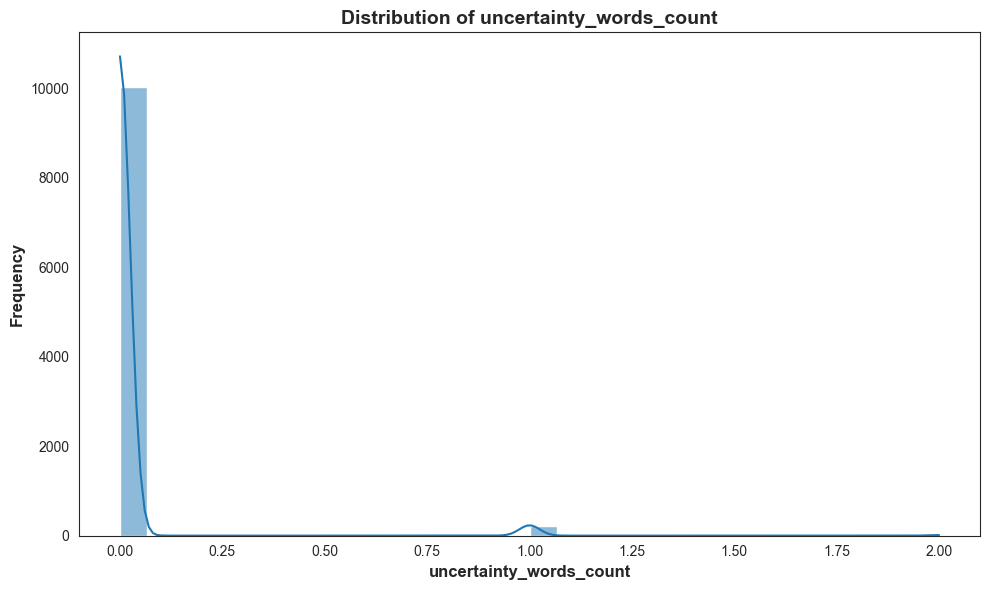

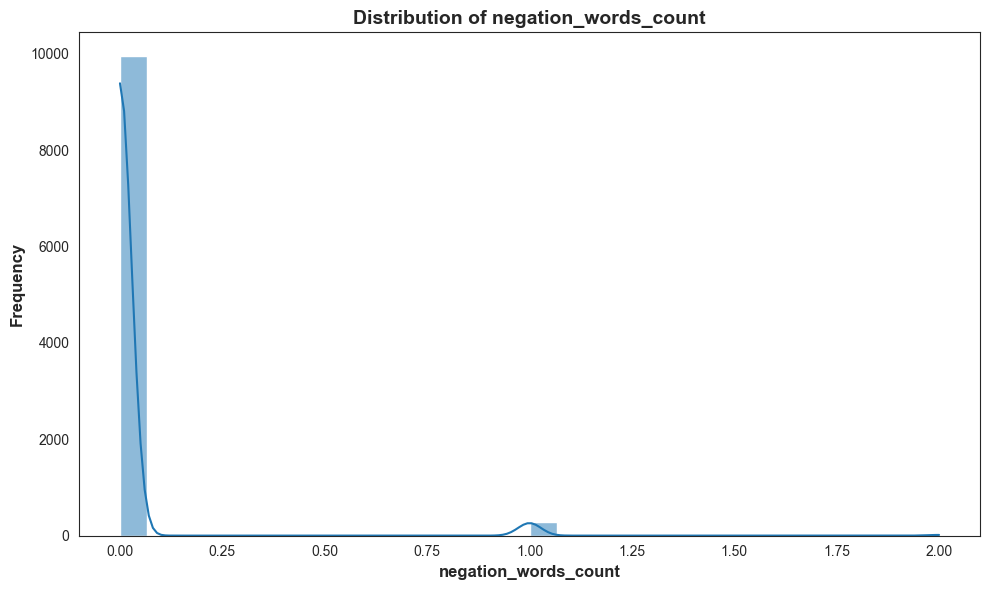

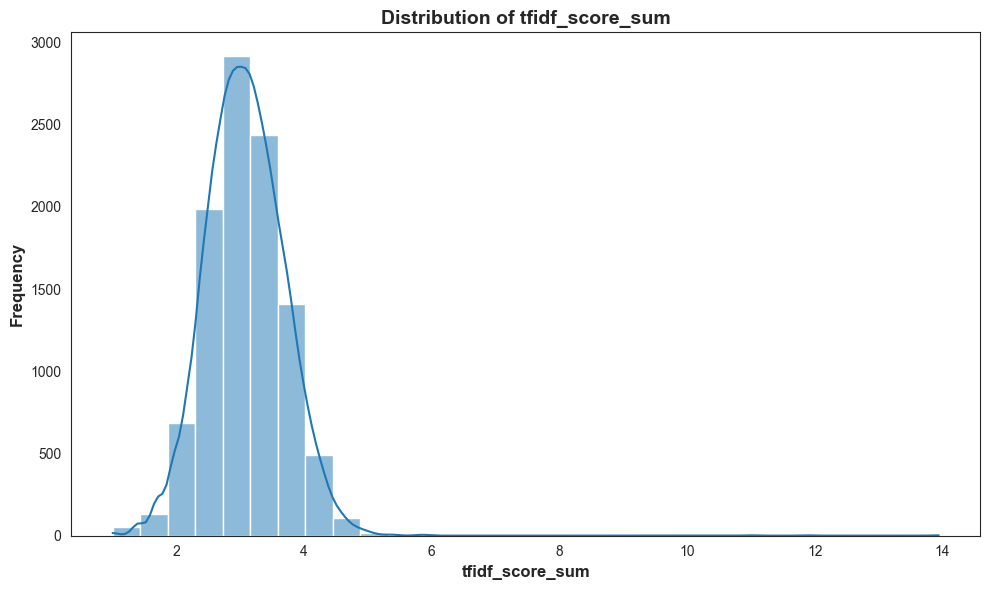

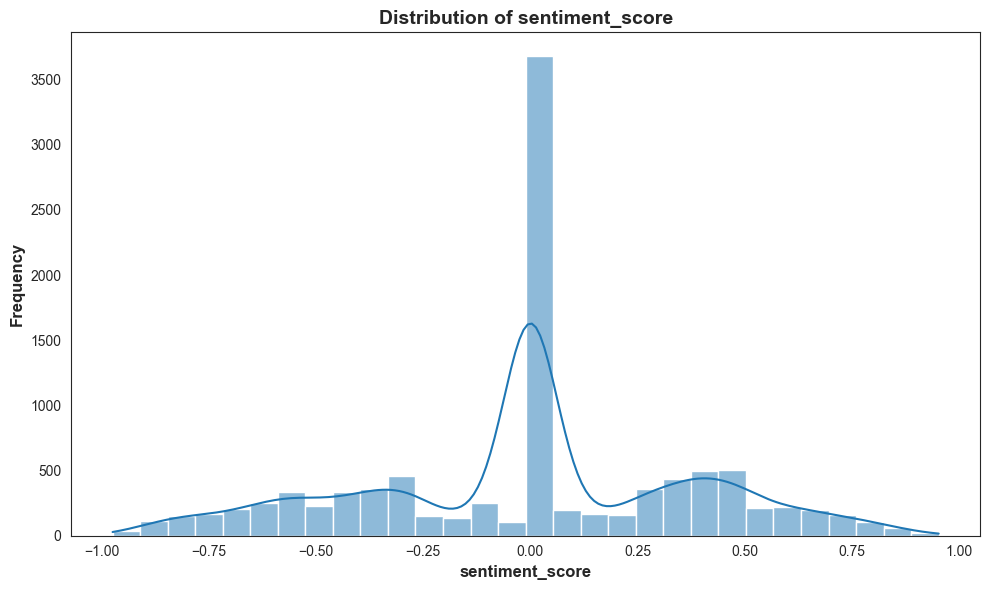

In [12]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[feature], kde=True, bins=30, color=_tab_10[0])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Violin Plots of Numerical Features by Label

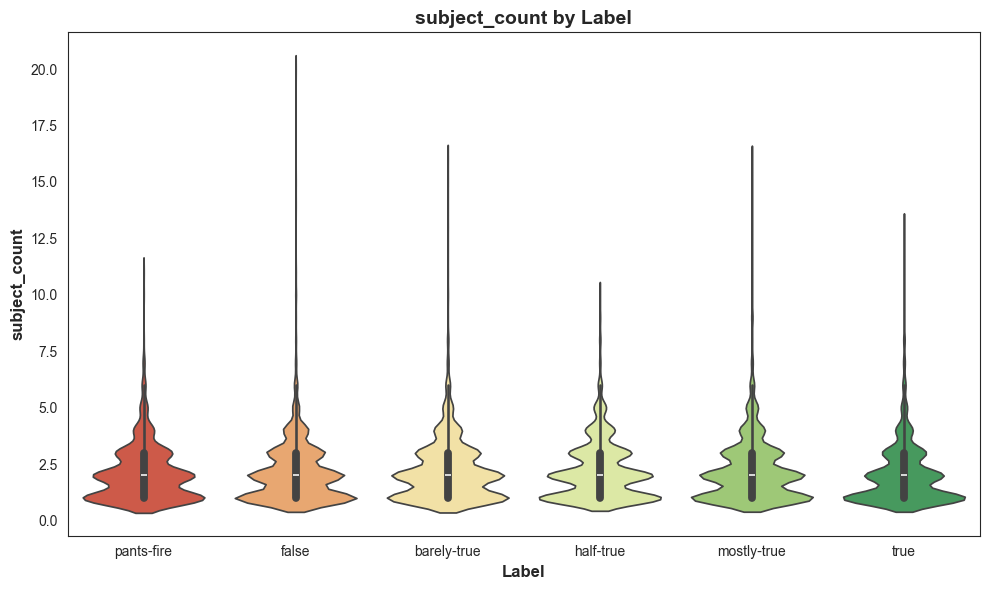

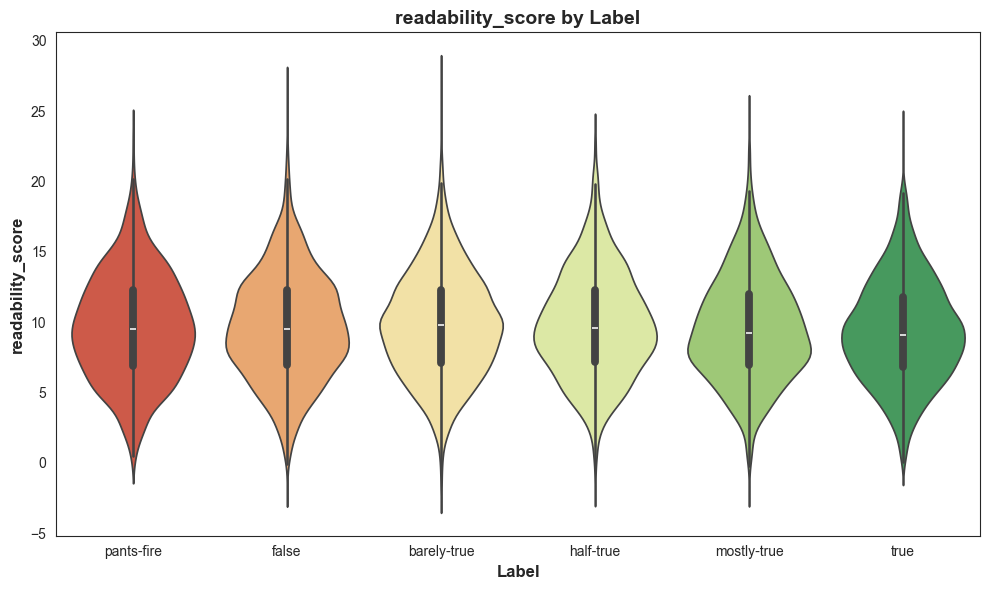

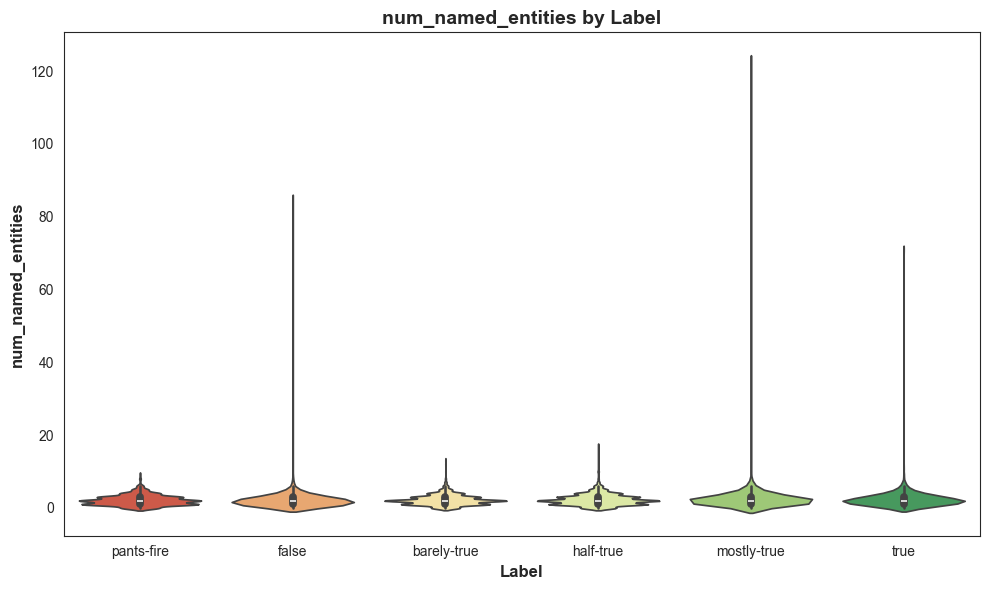

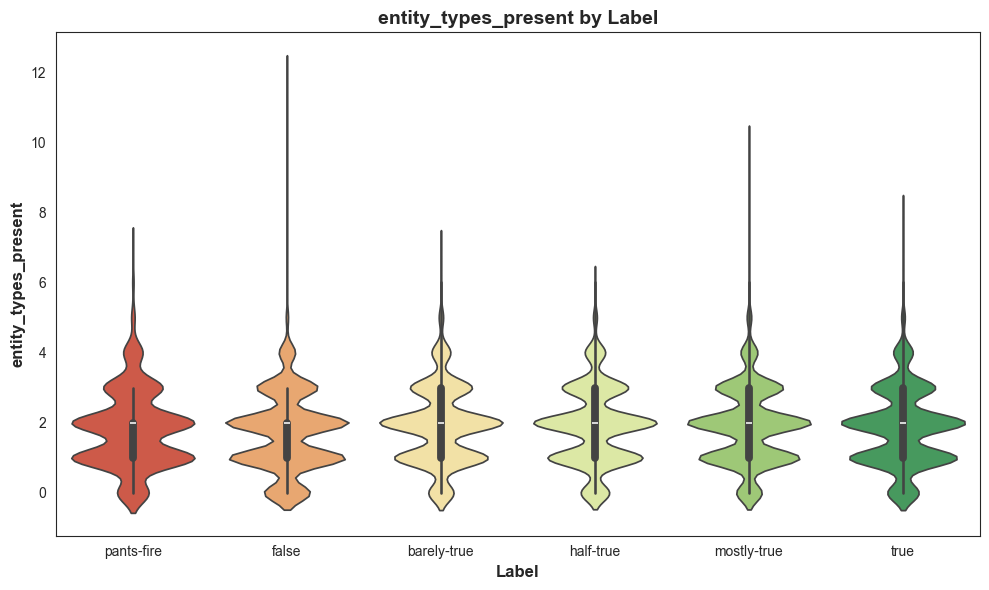

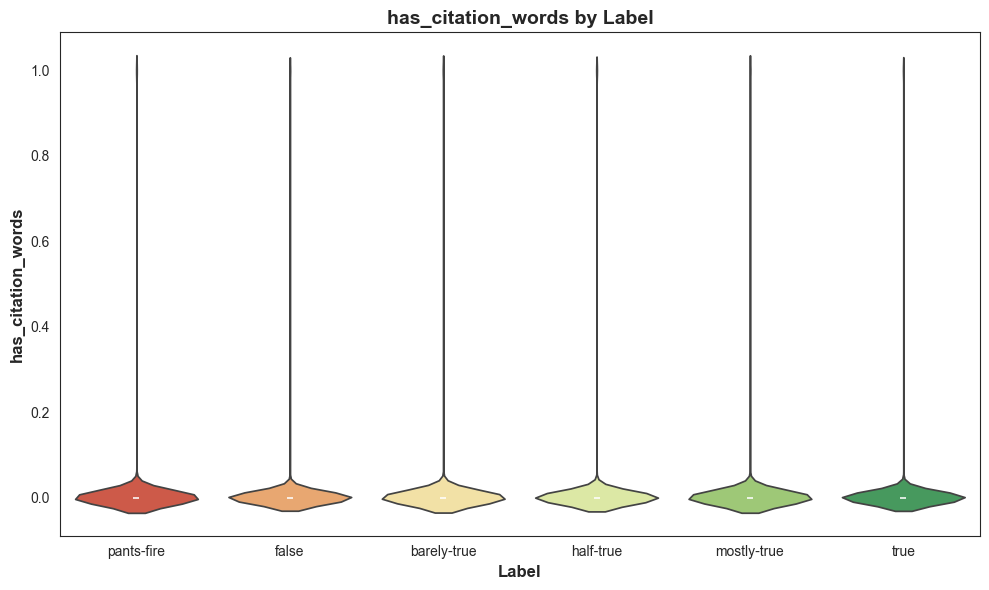

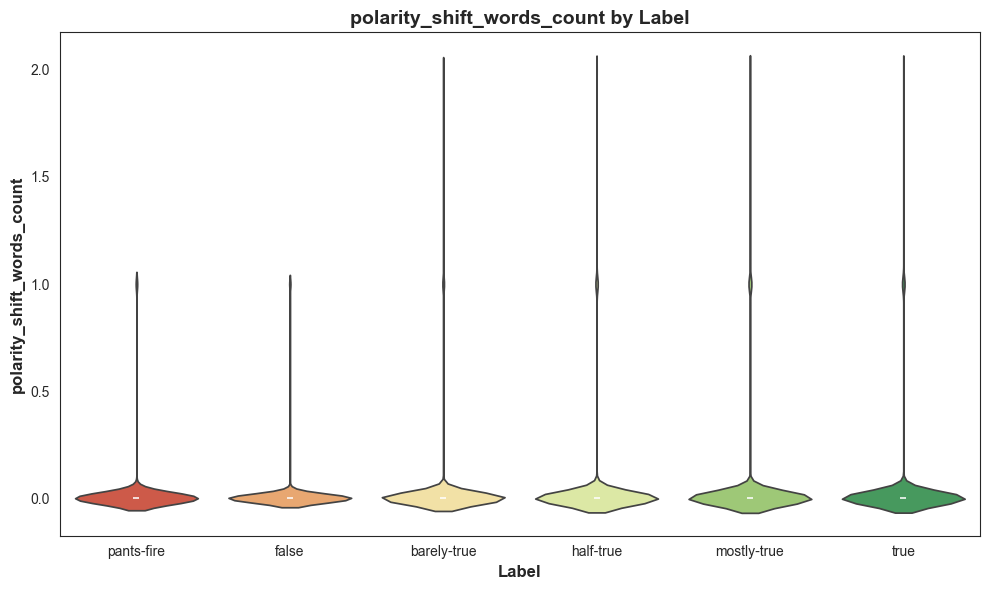

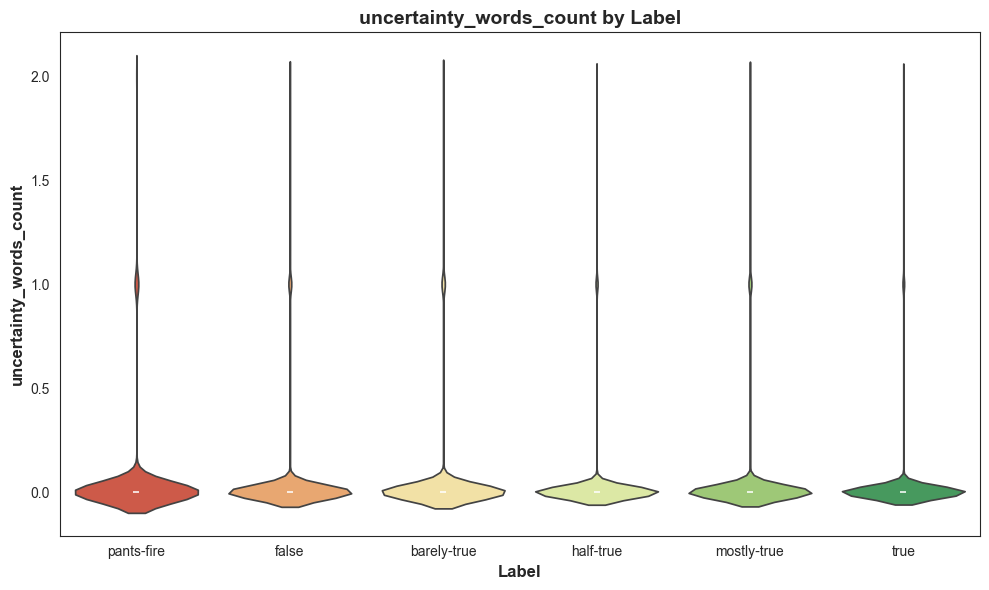

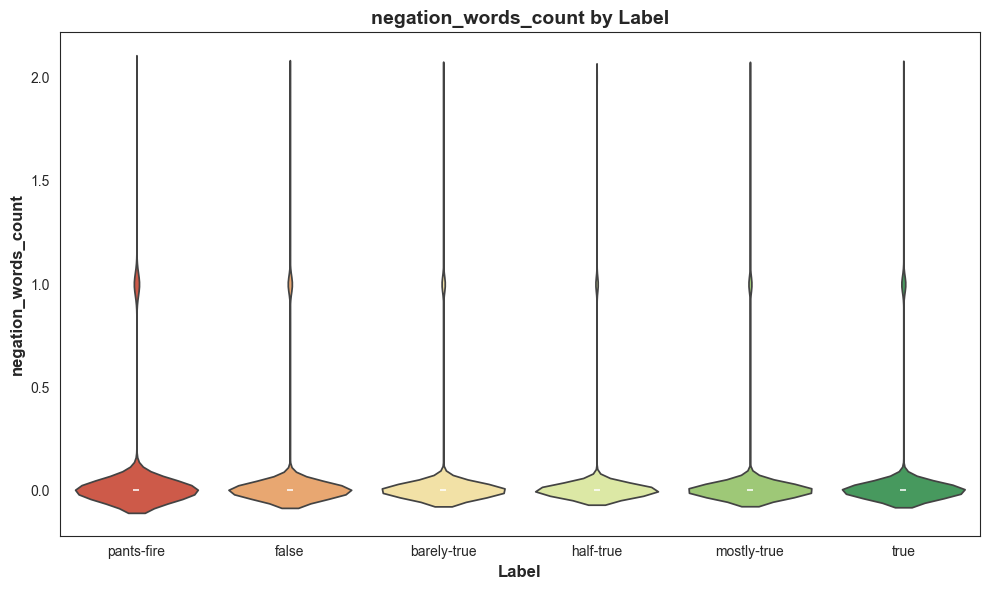

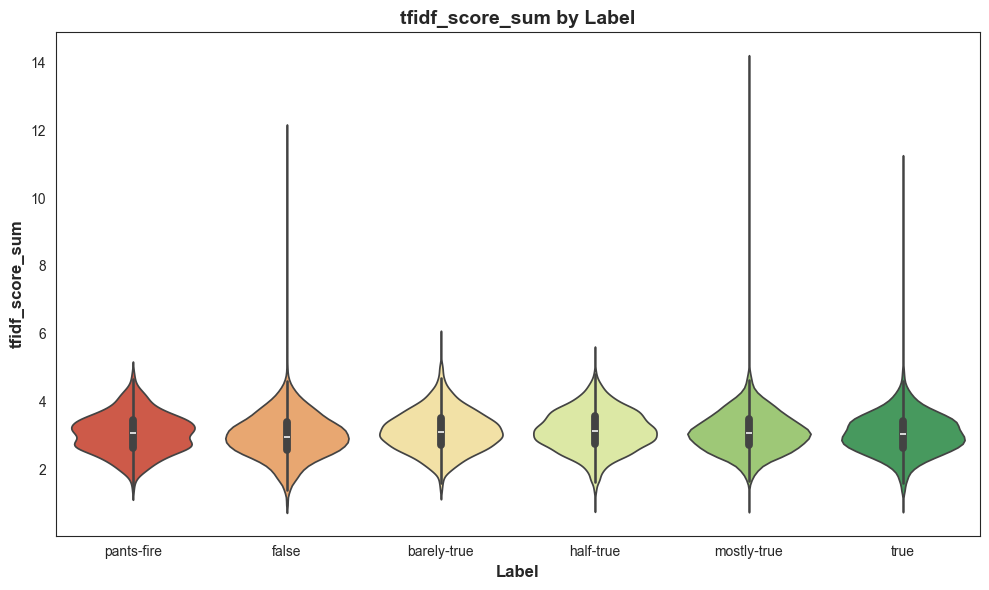

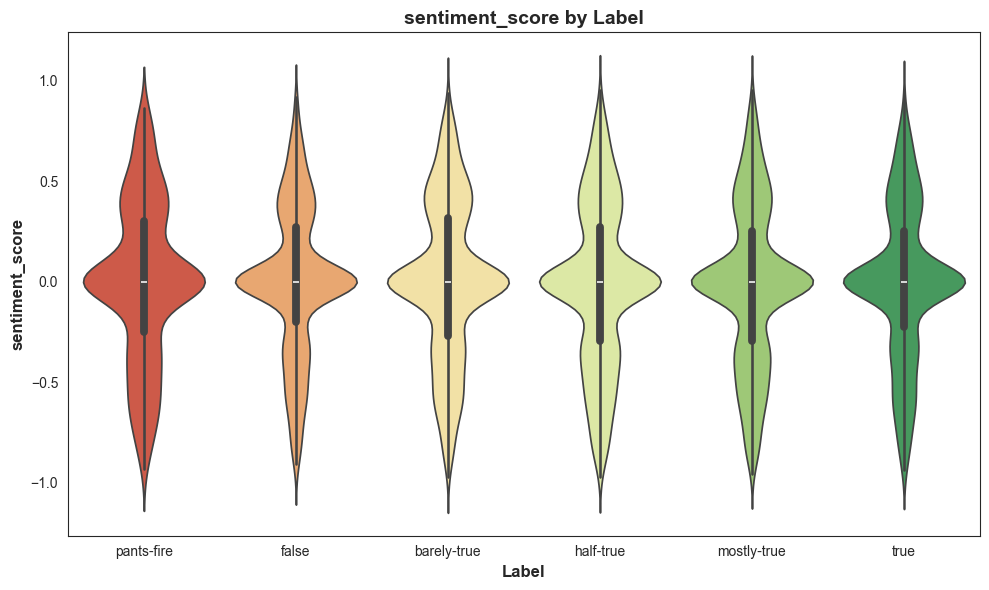

In [13]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x='label',
        y=feature,
        data=train,
        order=labels_order,
        palette=_RdYlGn,
        hue='label',
        hue_order=labels_order,
        legend=False
    )
    plt.title(f'{feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### Bar Plots of Categorical Features

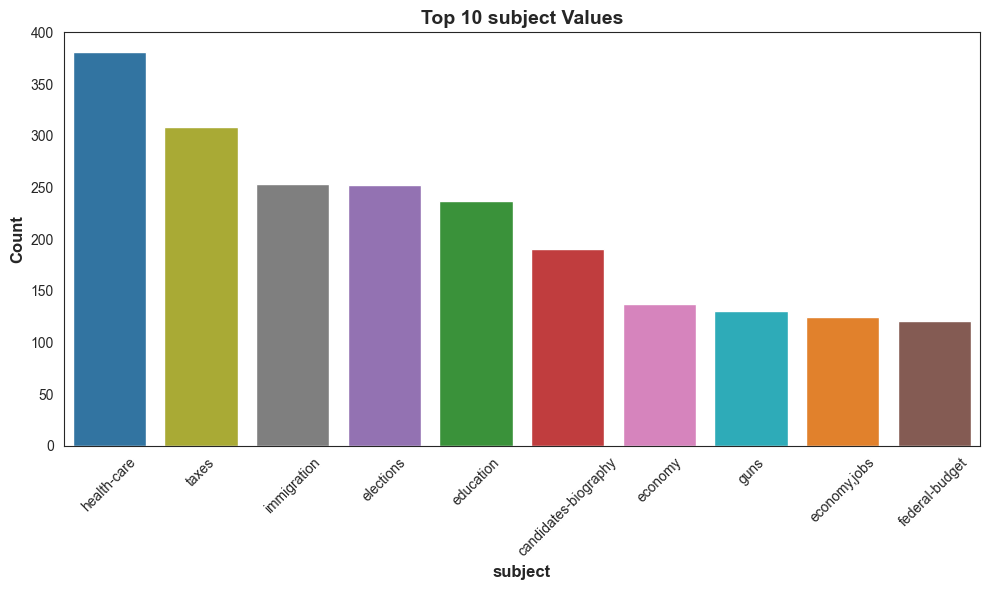

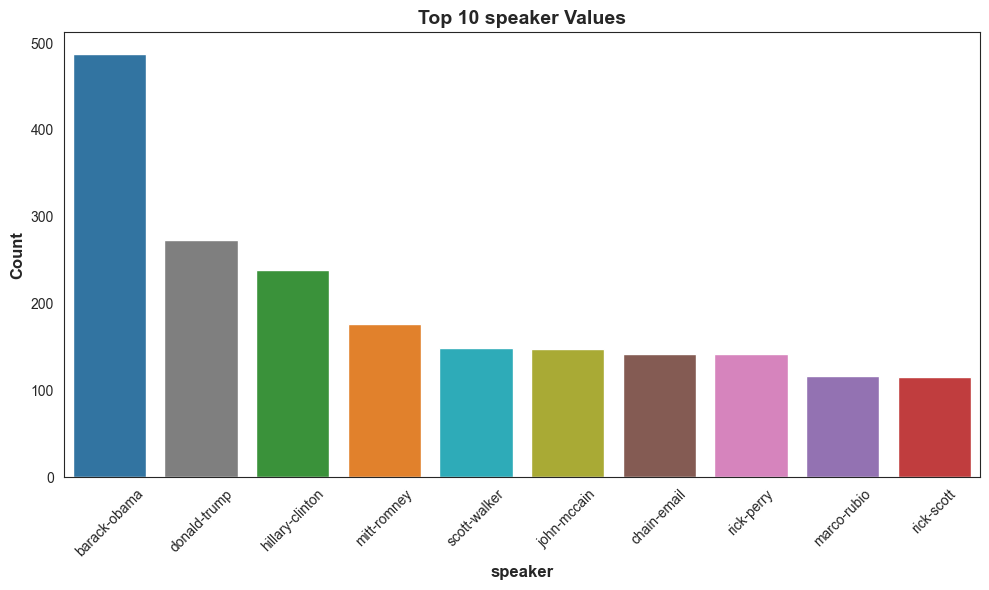

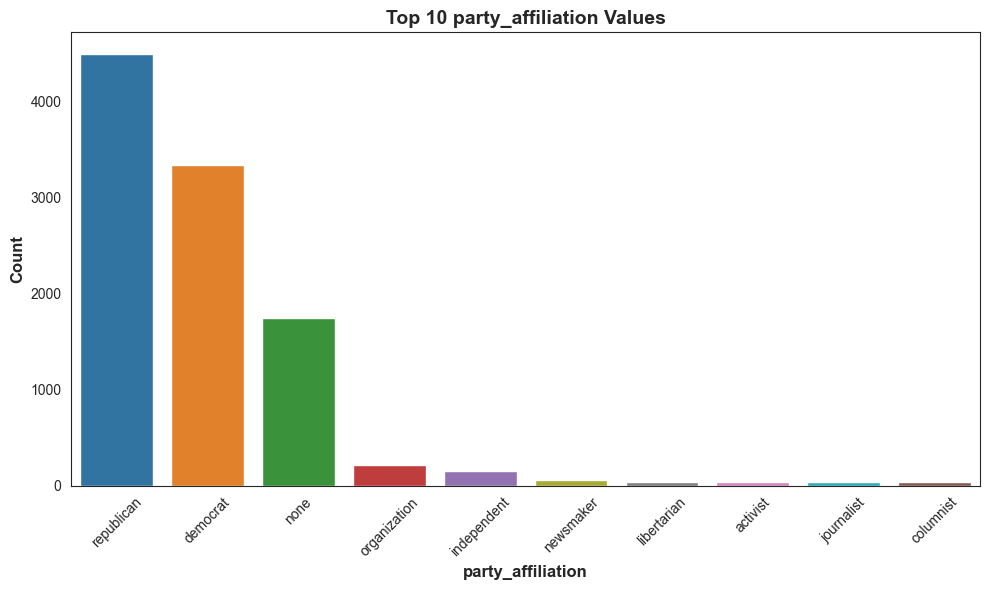

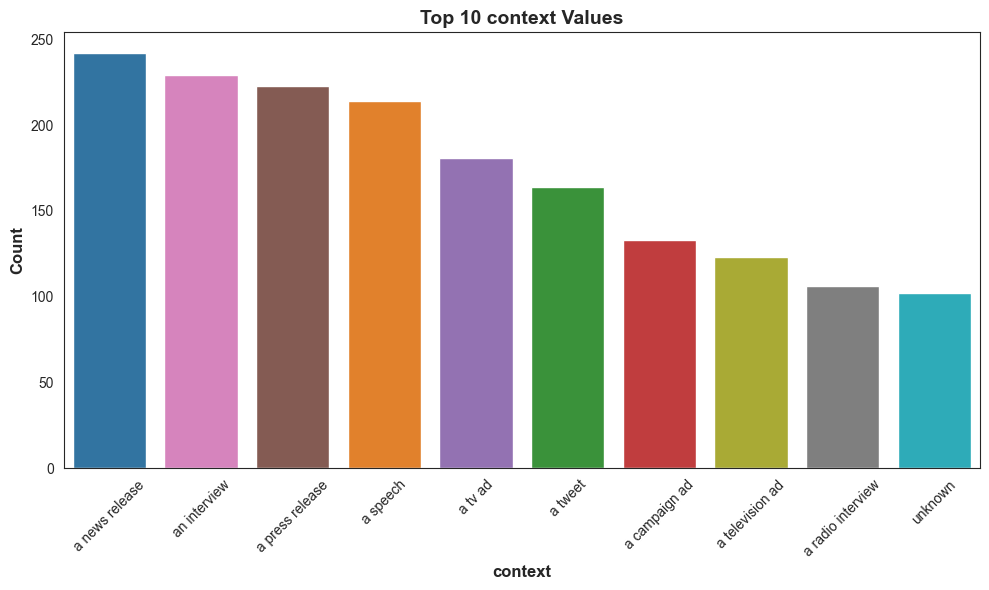

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    top_values = train[feature].value_counts().nlargest(10).index
    sns.countplot(
        x=feature,
        data=train[train[feature].isin(top_values)],
        order=top_values,
        palette=_tab_10,
        hue=feature
    )
    plt.title(f'Top 10 {feature} Values')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Box Plots of Numerical Features by Label

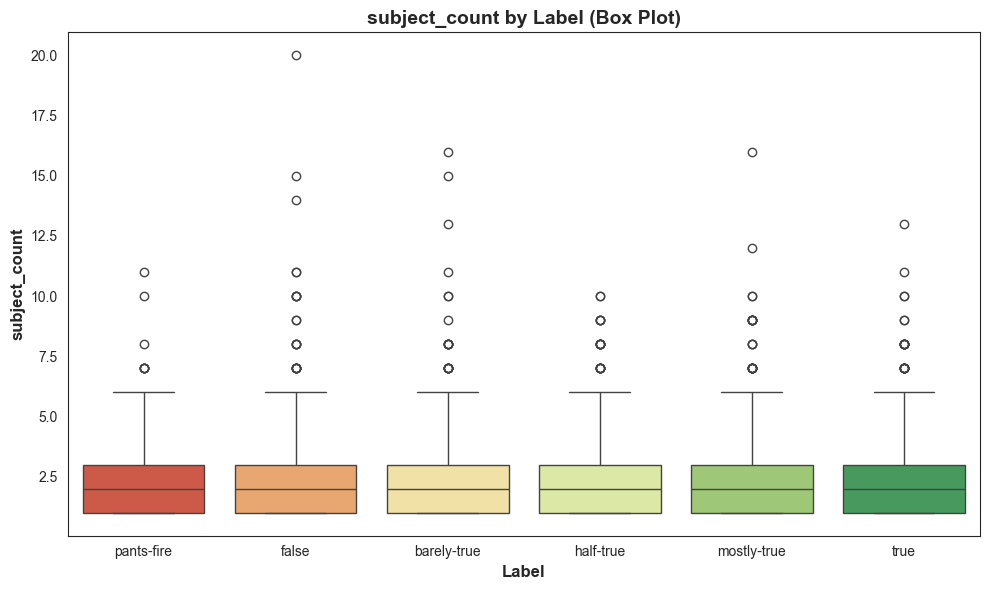

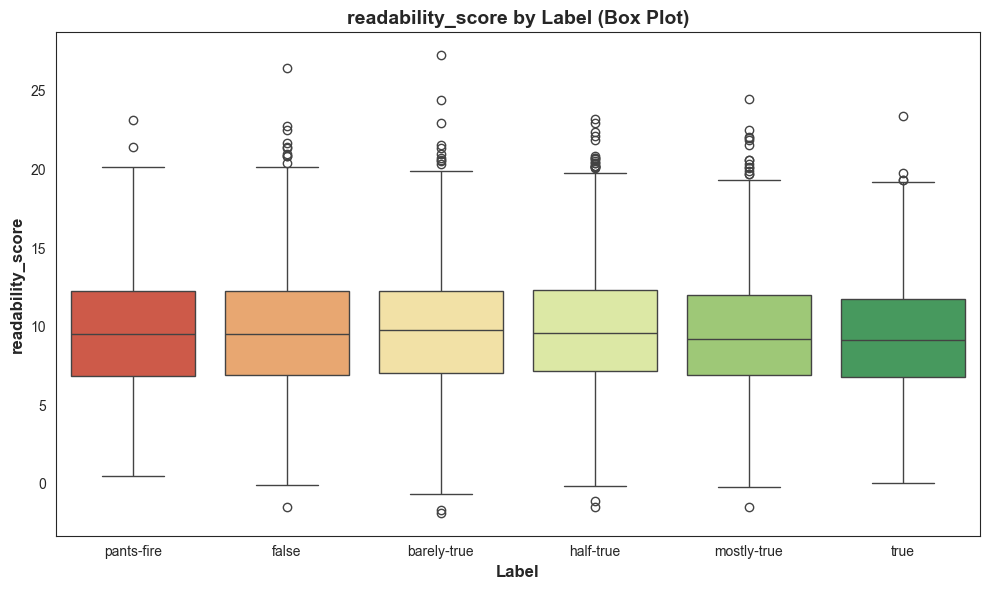

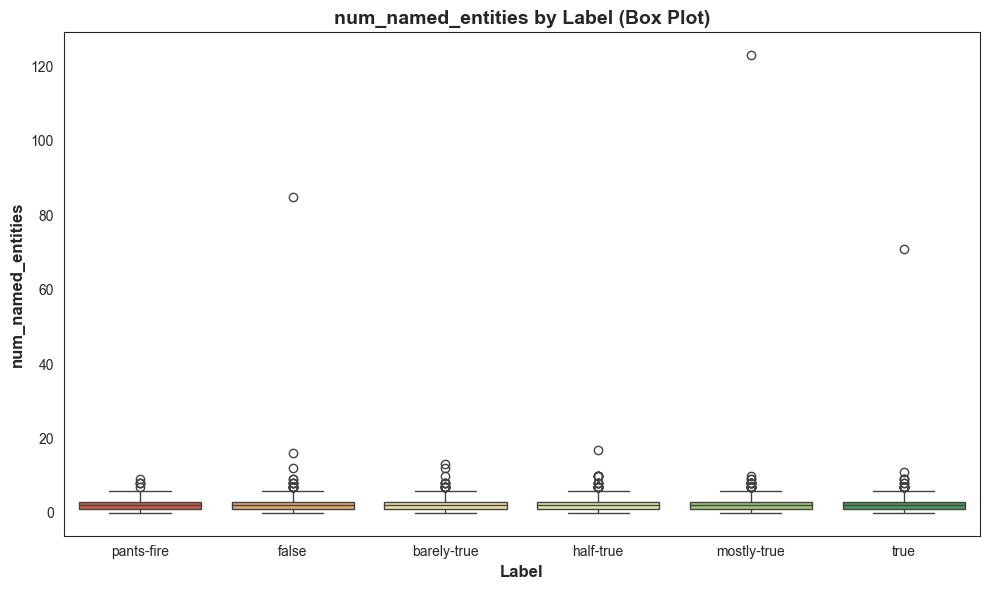

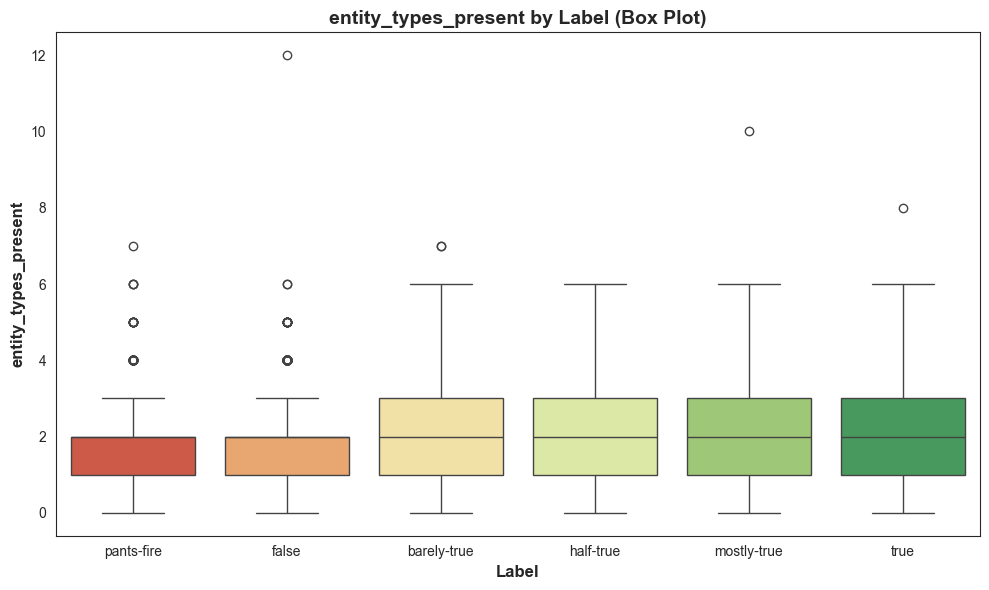

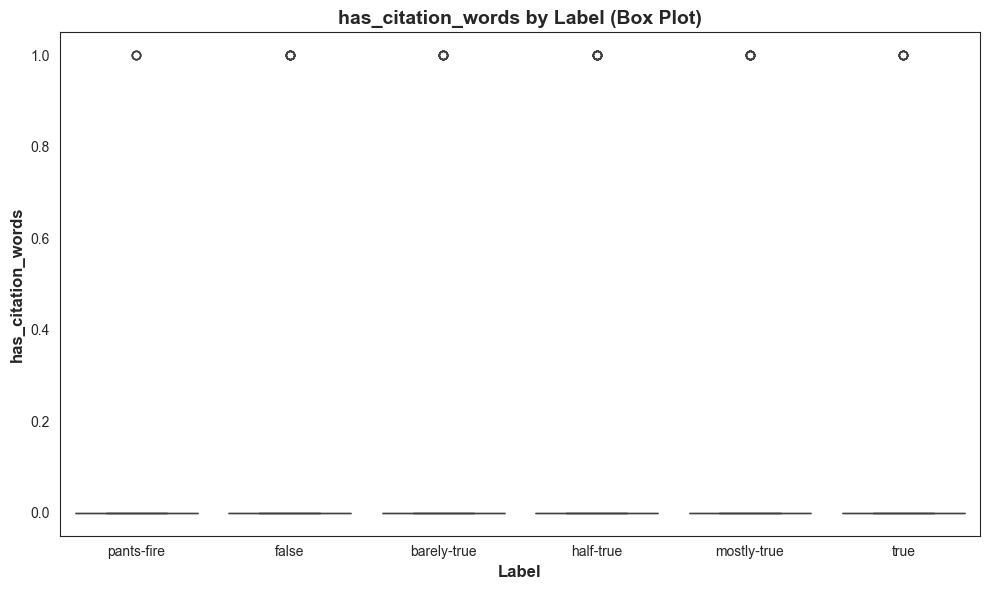

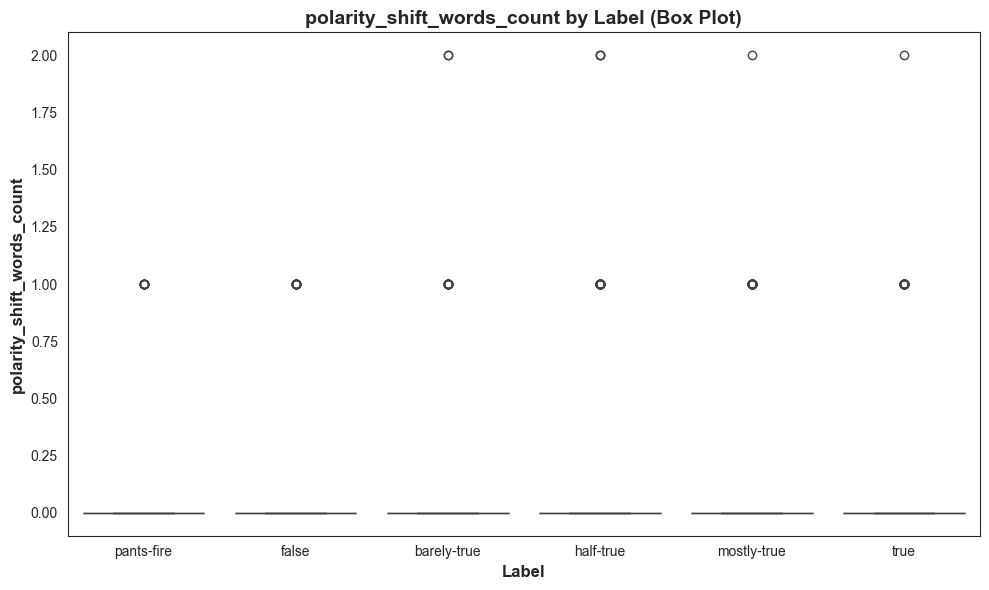

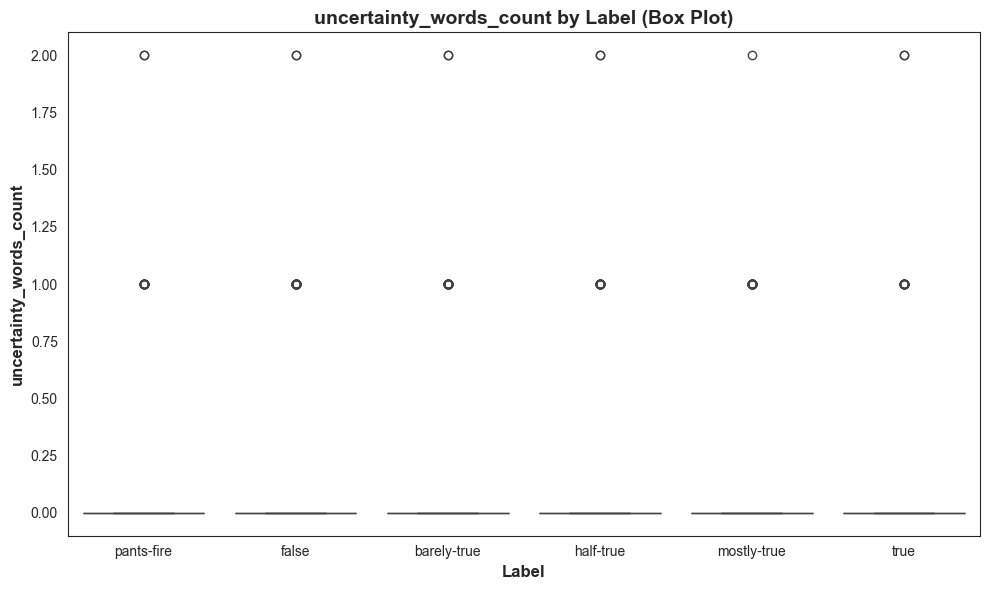

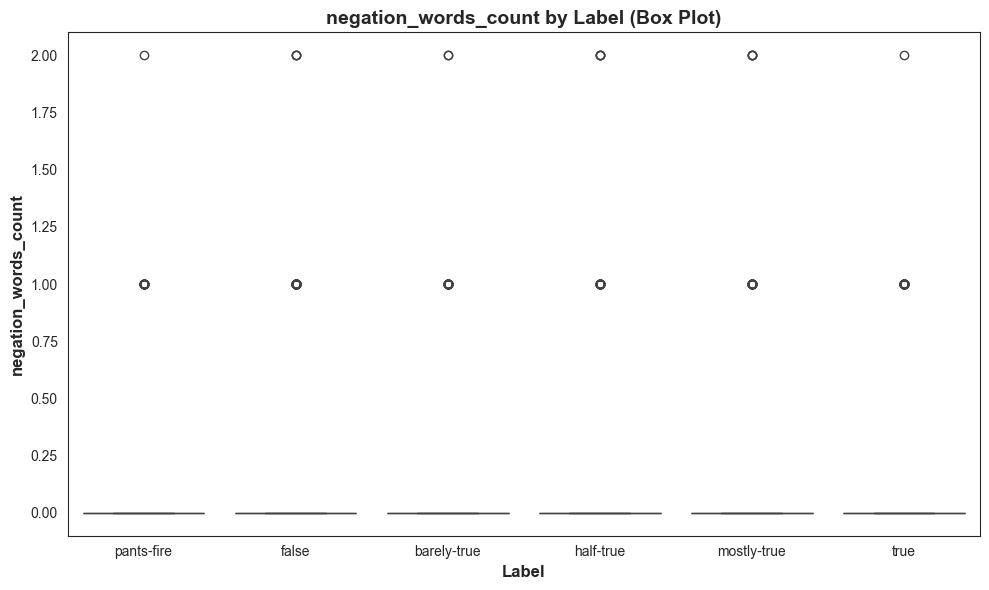

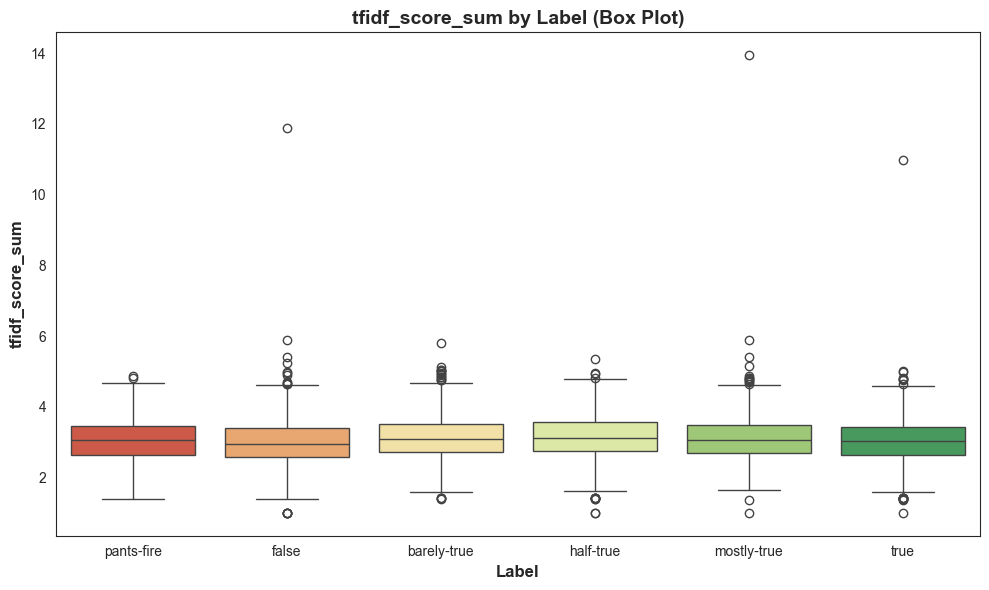

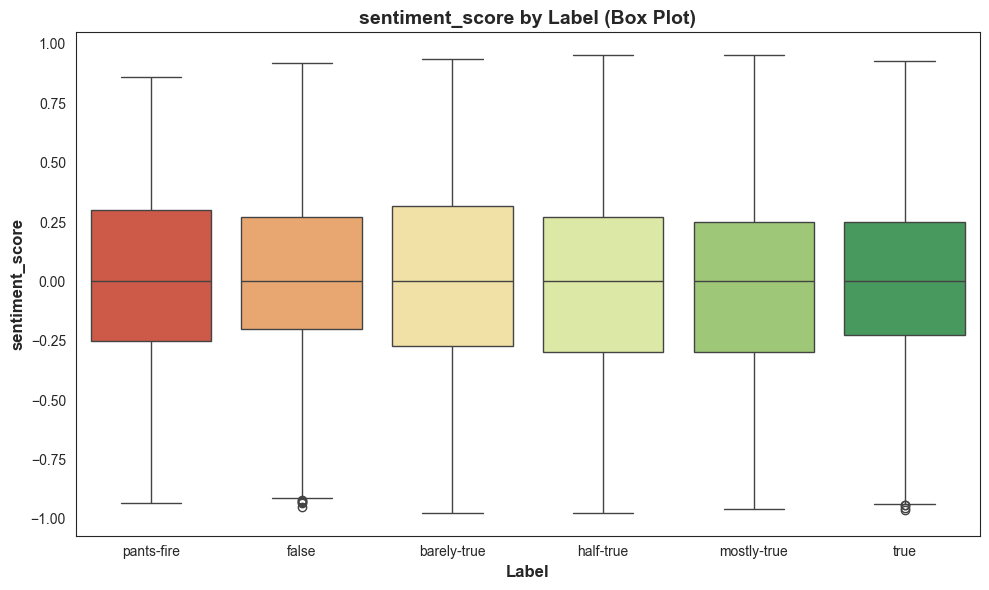

In [15]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='label',
        y=feature,
        data=train,
        order=labels_order,
        palette=_RdYlGn,
        hue='label',
        hue_order=labels_order,
        legend=False
    )
    plt.title(f'{feature} by Label (Box Plot)')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

---